In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Check if file exists
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None

    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load image. Please check the file path or format.")
        return None
    
    #Denoise the image
    denoised_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

    #Contrast Enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)
    enhanced_img = clahe.apply(gray)

    #Convert to HSV
    hsv_img = cv2.cvtColor(enhanced_img, cv2.COLOR_GRAY2BGR)
    hsv_img = cv2.cvtColor(hsv_img, cv2.COLOR_BGR2HSV)

    #Removing Green and Blue Channels
    hsv_img[:, :, 0] = 0
    hsv_img[:, :, 1] = 0




    #Display the image
    plt.title("Original Image")
    plt.imshow(img)
    plt.show()

    plt.title("Denoised Image")
    plt.imshow(denoised_img)
    plt.show()

    plt.title("Contrast Enhanced Image")
    plt.imshow(enhanced_img, cmap='gray')
    plt.show()

    plt.title("HSV Image")
    plt.imshow(hsv_img)
    plt.show()


    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    return img




In [46]:
image_path = r"C:\Users\ASUS\OneDrive\Desktop\marine-debris-detection\data\original_data\images\vid_000002_frame0000013.jpg"
# preprocess_image(image_path)

Bounding Box Origin: (224, 167)


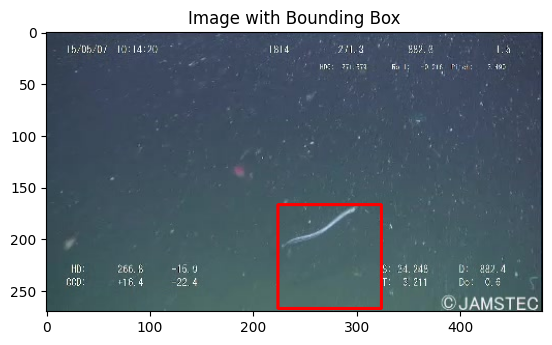

In [ ]:
import json
import os

def preprocess_annotation(annotation_path, image_path):
    # Check if the annotation file exists
    if not os.path.exists(annotation_path):
        raise FileNotFoundError(f"Annotation file not found: {annotation_path}")
    
    # Load JSON annotation
    with open(annotation_path, 'r') as file:
        annotation = json.load(file)

    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image file not found: {image_path}")
    
    # Process the annotation (example: extracting bounding box)
    for obj in annotation.get('objects', []):
        if 'bitmap' in obj:
            bbox_origin = obj['bitmap']['origin']
            bbox_data = obj['bitmap']['data']

            # Convert the bounding box info if needed
            x, y = bbox_origin
            print(f"Bounding Box Origin: ({x}, {y})")


    # Display the image with bounding box
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.rectangle(img, (x, y), (x + 100, y + 100), (255, 0, 0), 2)
    plt.title("Image with Bounding Box")
    plt.imshow(img)

    
    return img

# Test the function with error handling
image_path = r'C:\Users\ASUS\OneDrive\Desktop\marine-debris-detection\data\original_data\images\vid_000003_frame0000003.jpg'
annotation_path = r'C:\Users\ASUS\OneDrive\Desktop\marine-debris-detection\data\original_data\annotations\vid_000003_frame0000003.jpg.json'


try:
    preprocess_annotation(annotation_path, image_path)
except FileNotFoundError as e:
    print(e)
